In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('./data/train.csv')

In [4]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

## Geographical plotting/data - Questions to Nelli

/Users/aydinyanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(37.7, 37.82)

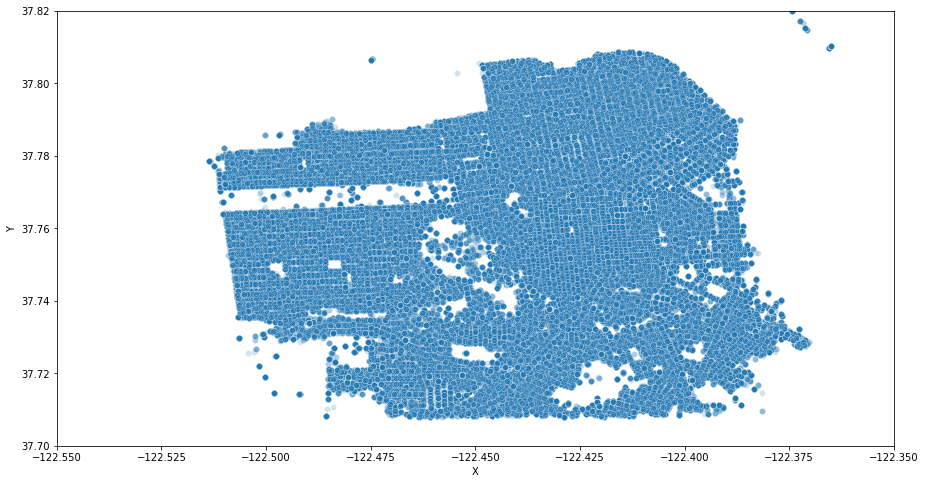

In [6]:
plt.figure(figsize = (15,8))
sns.scatterplot(train['X'], train['Y'], alpha=0.2)
plt.xlim(-122.55, -122.35)
plt.ylim(37.7,37.82)

In [7]:
# Uncomment and run when running the code the first time (or do the installation directly in your terminal)
# !pip install folium

In [8]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [9]:
prost = train[train['Category'] == 'PROSTITUTION']

In [10]:
prost.shape

(7484, 9)

In [11]:
bribe = train[train['Category'] == 'BRIBERY']

In [12]:
import folium

In [13]:
fake_df = train[:20]

In [14]:
fake_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [15]:
%%time
map_pickup = folium.Map(location=[37.8,-122.5])
fake_df.apply(lambda row:folium.CircleMarker(location=[row['Y'], row['X']]).add_to(map_pickup), axis=1) #try these with bribe and prost for fun

map_pickup

CPU times: user 8.34 ms, sys: 3.46 ms, total: 11.8 ms
Wall time: 13.1 ms


### EDA on the neighbourhood data

In [16]:
neighbourhoods = pd.read_csv('data/sf_neighbourhoods.csv')
neighbourhoods.head()

,LINK,the_geom,name
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",MULTIPOLYGON (((-122.49345526799993 37.7835181...,Seacliff
1,NaN,MULTIPOLYGON (((-122.48715071499993 37.7837854...,Lake Street
2,http://www.nps.gov/prsf/index.htm,MULTIPOLYGON (((-122.47758017099994 37.8109931...,Presidio National Park
3,NaN,MULTIPOLYGON (((-122.47241052999993 37.7873465...,Presidio Terrace
4,http://www.sfgate.com/neighborhoods/sf/innerri...,MULTIPOLYGON (((-122.47262578999994 37.7863148...,Inner Richmond


In [121]:
neighb_coord = []
for row in neighbourhoods['the_geom']:
    clean_row = row.strip('MULTIPOLYGON (((')
    clean_row = clean_row.strip(')))')
    clean_row = ' ' + clean_row # Putting everything into a uniform string to further split it into a list
    clean_row = clean_row.split(',')
    clean_row = [val.split(' ') for val in clean_row]
    for i in range(len(clean_row)):
        clean_row[i].pop(0)
    clean_row = [list(map(float, val)) for val in clean_row]
    neighb_coord.append(clean_row)

In [122]:
neighbourhoods['coordinates'] = neighb_coord

In [123]:
neighbourhoods.head()

,LINK,the_geom,name,coordinates
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",MULTIPOLYGON (((-122.49345526799993 37.7835181...,Seacliff,"[[-122.49345526799993, 37.78351817100008], [-1..."
1,NaN,MULTIPOLYGON (((-122.48715071499993 37.7837854...,Lake Street,"[[-122.48715071499993, 37.783785427000055], [-..."
2,http://www.nps.gov/prsf/index.htm,MULTIPOLYGON (((-122.47758017099994 37.8109931...,Presidio National Park,"[[-122.47758017099994, 37.81099311300005], [-1..."
3,NaN,MULTIPOLYGON (((-122.47241052999993 37.7873465...,Presidio Terrace,"[[-122.47241052999993, 37.787346539000055], [-..."
4,http://www.sfgate.com/neighborhoods/sf/innerri...,MULTIPOLYGON (((-122.47262578999994 37.7863148...,Inner Richmond,"[[-122.47262578999994, 37.786314806000064], [-..."
